In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('bank_transactions.csv')
df = df.sample(n=10000,random_state=42)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 892845 to 111904
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            10000 non-null  object 
 1   CustomerID               10000 non-null  object 
 2   CustomerDOB              9966 non-null   object 
 3   CustGender               9991 non-null   object 
 4   CustLocation             10000 non-null  object 
 5   CustAccountBalance       9981 non-null   float64
 6   TransactionDate          10000 non-null  object 
 7   TransactionTime          10000 non-null  int64  
 8   TransactionAmount (INR)  10000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 781.2+ KB


In [10]:
df.head() #First 5 entries of dataset

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,8/9/84,M,JASPUR,84447.82,7/9/16,183210,11858.0
444994,T444995,C4588538,2/1/94,M,GURGAON,12549.49,16/8/16,161300,250.0
614896,T614897,C2416476,14/11/90,M,NEW DELHI,33607.65,26/8/16,102007,3360.0
457036,T457037,C5940151,15/9/90,M,HYDERABAD,38238.86,21/8/16,110438,250.0
997441,T997442,C5922989,27/11/88,M,PURBO MEDINIPUR,9506.85,14/9/16,90810,33.0


In [11]:
df.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                34
CustGender                  9
CustLocation                0
CustAccountBalance         19
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

We observed missing values in certain columns. Specifically, the columns "CustomerDOB," "CustGender," "CustLocation," and "CustAccountBalance" have some missing data.

The majority of customers are identified as Male (M), followed by Female (F). There is one entry with a CustGender value of "T," which is probably an error.

The "CustLocation" column contains various locations where customers are located, with Mumbai having the highest number of entries

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [15]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,9938,9938.00,9938,9938.00,9938.00
mean,1983-08-16 07:45:33.507748032,101285.14,2016-07-26 14:27:47.780237312,156736.51,1600.69
min,1800-01-01 00:00:00,0.00,2016-01-08 00:00:00,1.00,0.00
25%,1983-01-18 00:00:00,4729.19,2016-06-09 00:00:00,124009.00,160.25
50%,1988-06-22 00:00:00,16691.15,2016-08-20 00:00:00,164038.00,449.75
75%,1992-03-31 00:00:00,57770.51,2016-09-13 00:00:00,195705.25,1154.75
max,2072-12-31 00:00:00,14276260.10,2016-12-09 00:00:00,235921.00,167041.46
std,NaN,395271.77,NaN,51332.44,6145.50


In [16]:
cat_columns = ['CustGender', 'CustLocation']
for col in cat_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: CustGender
CustGender
M    7343
F    2595
Name: count, dtype: int64


Column: CustLocation
CustLocation
MUMBAI             943
BANGALORE          807
NEW DELHI          777
DELHI              690
GURGAON            681
                  ... 
STORE HYDERABAD      1
KUSHALNAGAR          1
SUNNYVALE            1
THRIUVALLUR          1
THIRUPPUR            1
Name: count, Length: 1256, dtype: int64




In [17]:
df['CustomerDOB'].value_counts()

CustomerDOB
1800-01-01    527
1989-01-01     11
1990-01-07     10
1990-10-08      9
1991-05-01      9
             ... 
1985-02-04      1
2050-06-03      1
1983-06-19      1
1978-12-23      1
1995-09-07      1
Name: count, Length: 5532, dtype: int64

In [18]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)
df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2022, 'CustomerDOB'] - pd.DateOffset(years = 100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB'])/np.timedelta64(1, 'Y')).round(0)
df.head()

#Best specified data of Customer's DOB

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [19]:
df['CustomerAge'].describe()
#IQR Logic and Quartile Analysis

count   9411.00
mean      38.58
std        8.85
min        8.00
25%       33.00
50%       36.00
75%       42.00
max       97.00
Name: CustomerAge, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9411 entries, 892845 to 111904
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            9411 non-null   object        
 1   CustomerID               9411 non-null   object        
 2   CustomerDOB              9411 non-null   datetime64[ns]
 3   CustGender               9411 non-null   object        
 4   CustLocation             9411 non-null   object        
 5   CustAccountBalance       9411 non-null   float64       
 6   TransactionDate          9411 non-null   datetime64[ns]
 7   TransactionTime          9411 non-null   int64         
 8   TransactionAmount (INR)  9411 non-null   float64       
 9   CustomerAge              9411 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 808.8+ KB


In [21]:
df1 = df.copy()

1.Customer Demographics:

1) Distribution of customers by gender (CustGender)
2) Age distribution of customers based on the "CustomerDOB" column
3) Location with the highest number of customers (CustLocation)

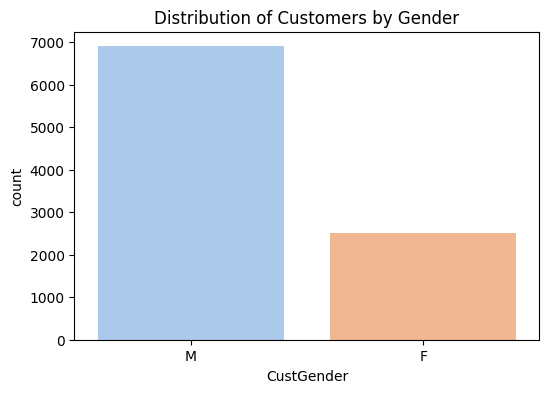

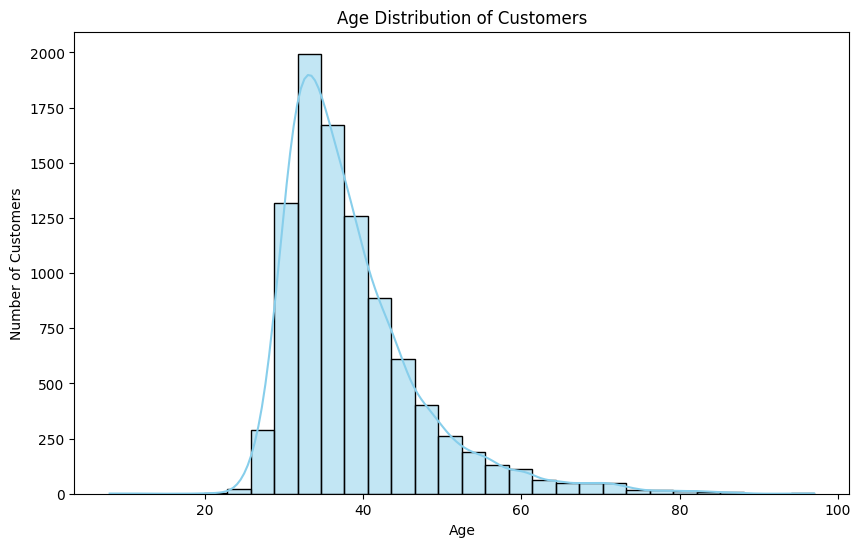

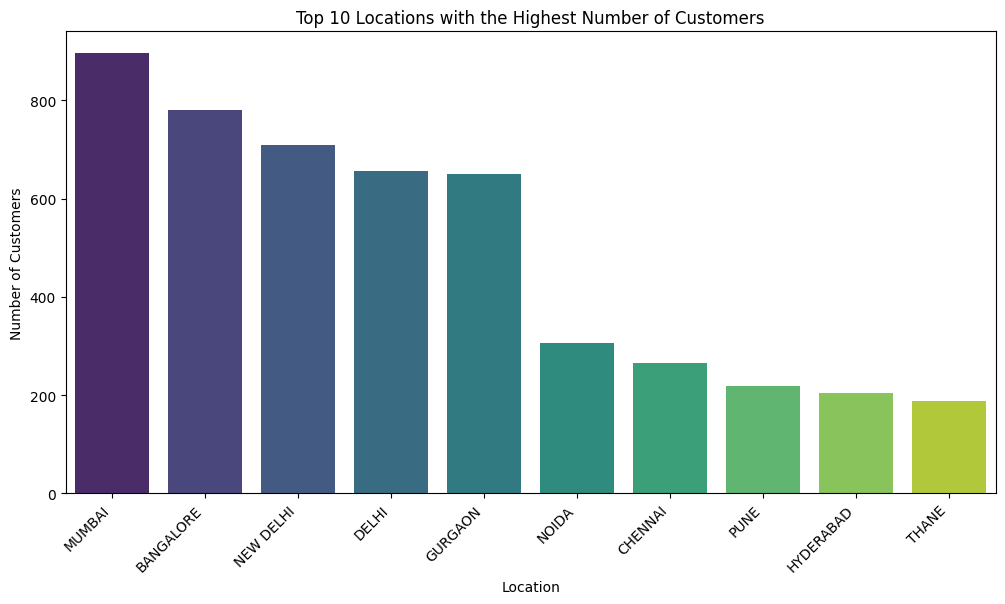

In [22]:
# 1. Distribution of customers by gender (CustGender)
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Distribution of Customers by Gender')
plt.show()

# 2. Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize=(10, 6))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 3. Location with the highest number of customers (CustLocation)
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

2. Customer Account and Transaction Analysis:

1) Distribution of account balances (CustAccountBalance) among customers
2) Distribution of transaction amounts (TransactionAmount (INR))
3) Correlation between customer account balance and transaction amount

In [23]:
df2 = df1.copy()

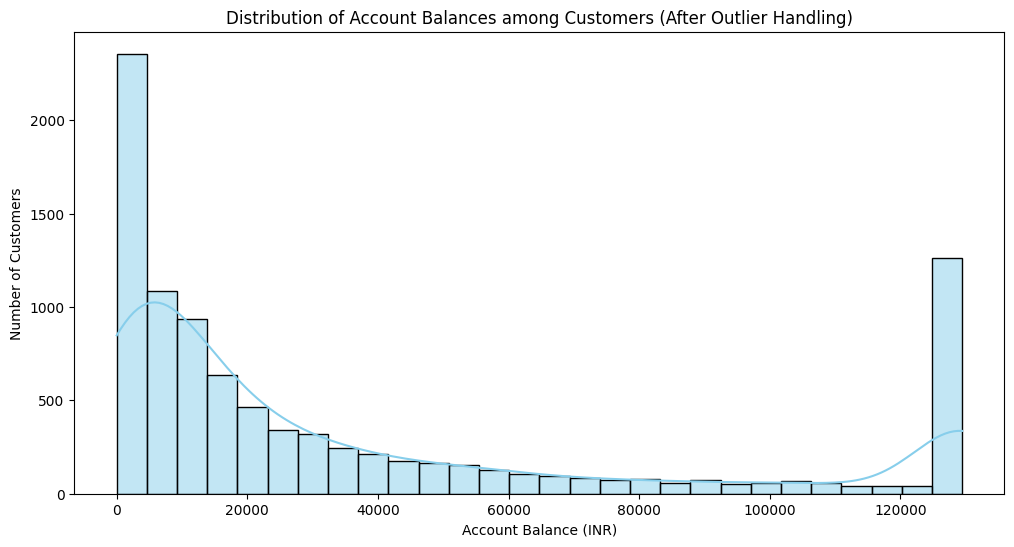

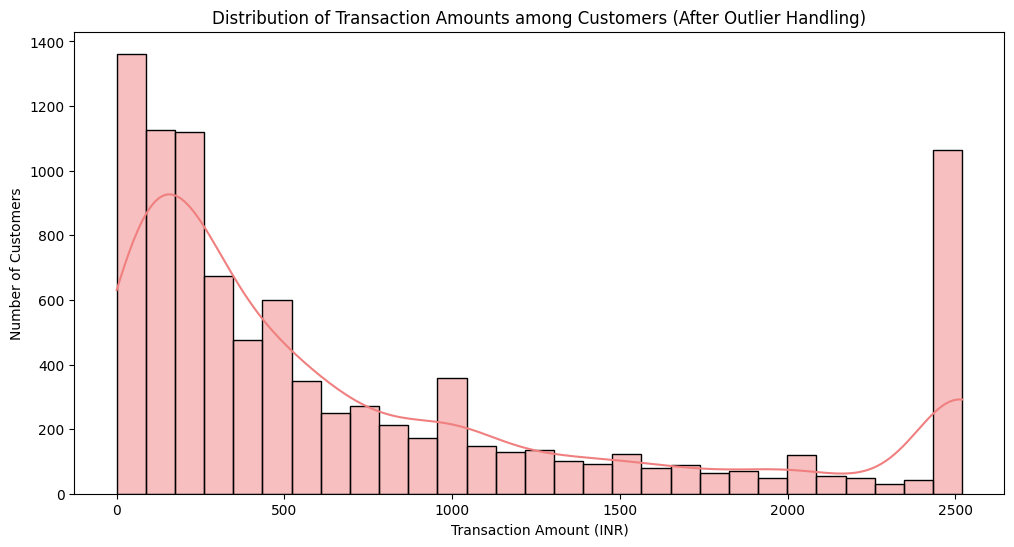

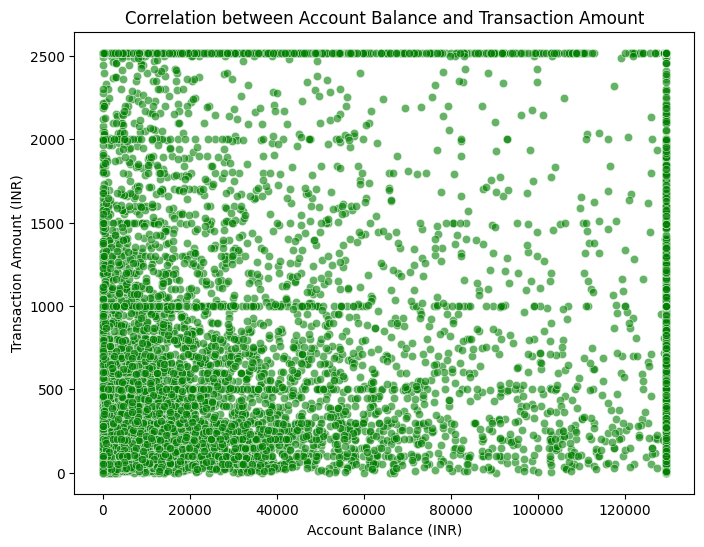

In [24]:
# Outlier Handling using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Handling outliers for CustAccountBalance and TransactionAmount (INR) columns
df1 = handle_outliers_iqr(df1, 'CustAccountBalance')
df1 = handle_outliers_iqr(df1, 'TransactionAmount (INR)')

# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribution of Account Balances among Customers (After Outlier Handling)')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amounts among Customers (After Outlier Handling)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='green', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()

In [25]:
df1[["TransactionAmount (INR)", "CustAccountBalance"]].describe()

,TransactionAmount (INR),CustAccountBalance
count,9411.00,9411.00
mean,768.23,37418.79
std,814.57,44518.52
min,0.00,0.00
25%,152.00,4598.61
50%,419.30,16060.11
75%,1099.11,54541.86
max,2519.78,129456.73


3.Customer Location Analysis:

1) Customers distributed across different locations
2) Locations compared with TransactionAmt

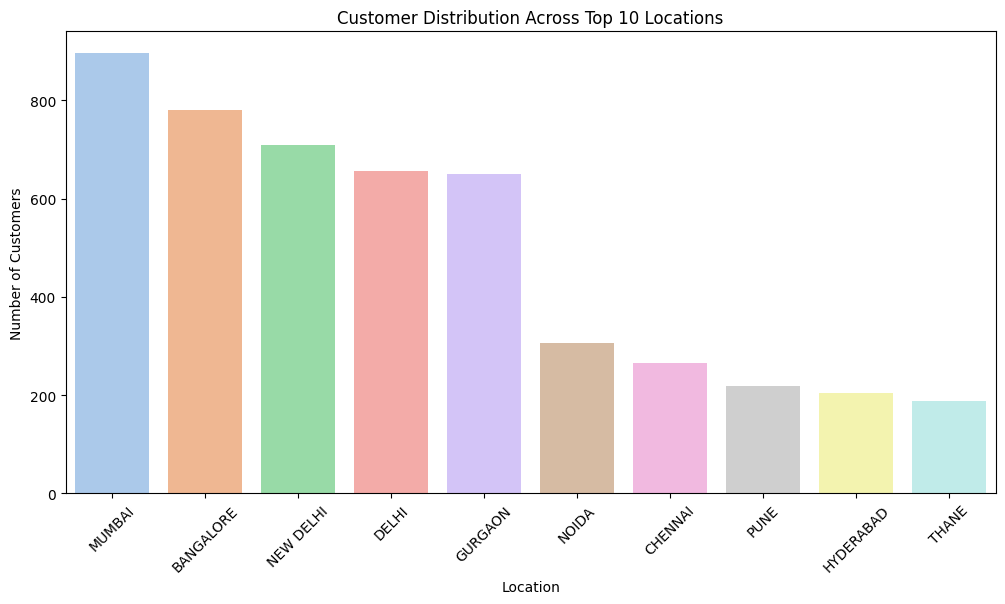

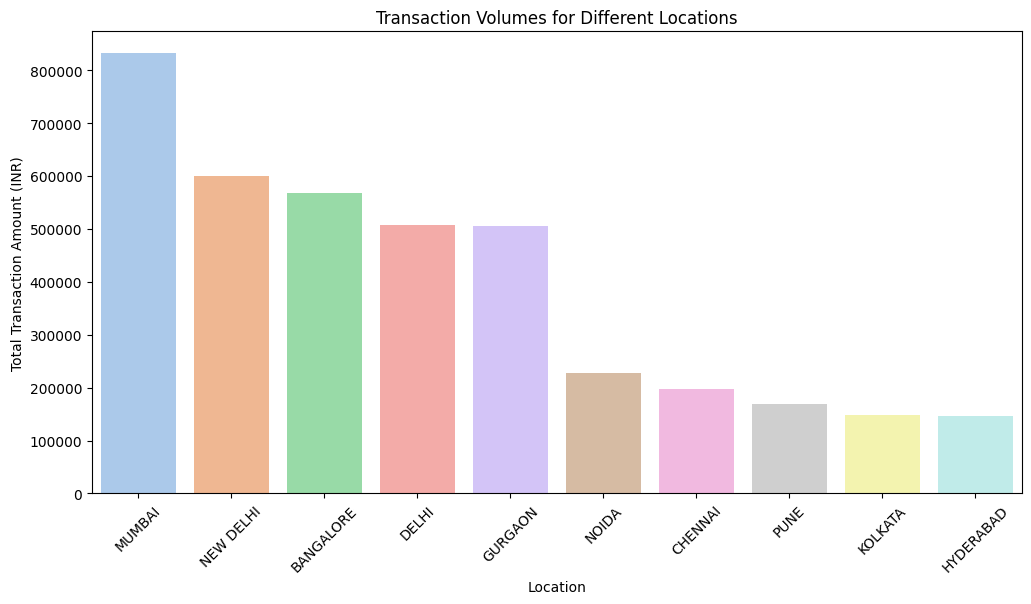

In [26]:
top_10_locations = df1['CustLocation'].value_counts().nlargest(10)

# Visualize customer distribution across top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='pastel')
plt.title('Customer Distribution Across Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


location_transaction_volumes = df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='pastel')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

4.Customer Recency, Frequency, Monetary (RFM) Analysis:

1) Recency (R): The number of days since the customer's most recent transaction.
2) Frequency (F): The total number of transactions made by each customer.
3) Monetary (M): The total monetary value of all transactions made by each customer.
4) RFM features distributed among customers, Identifying valuable customer segments

In [27]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

current_date = df1['TransactionDate'].max()
rfm_data = df1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

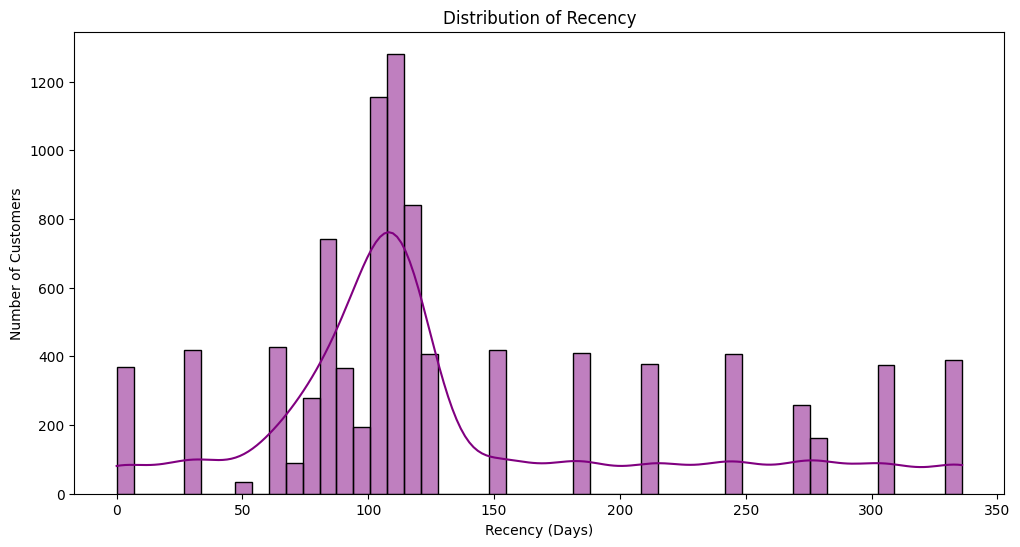

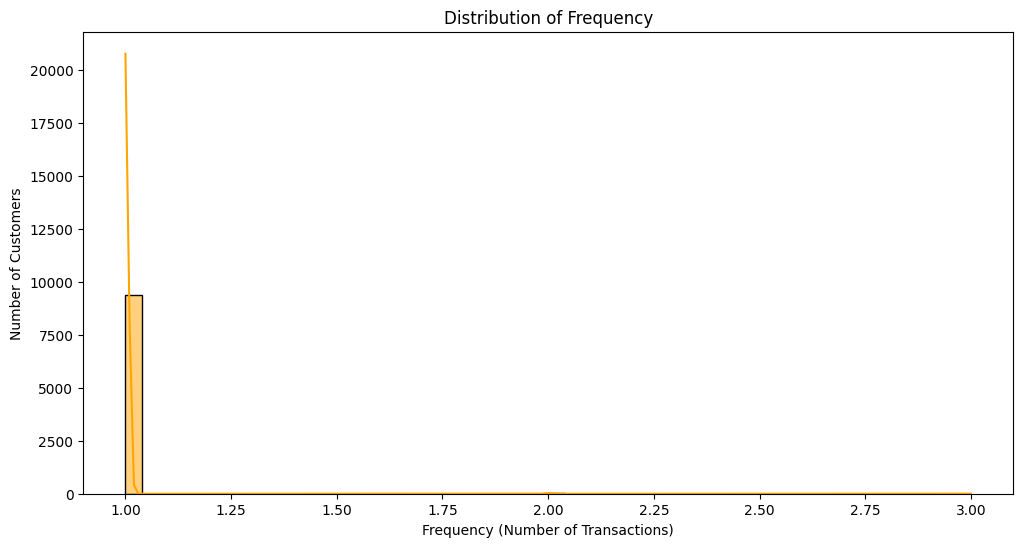

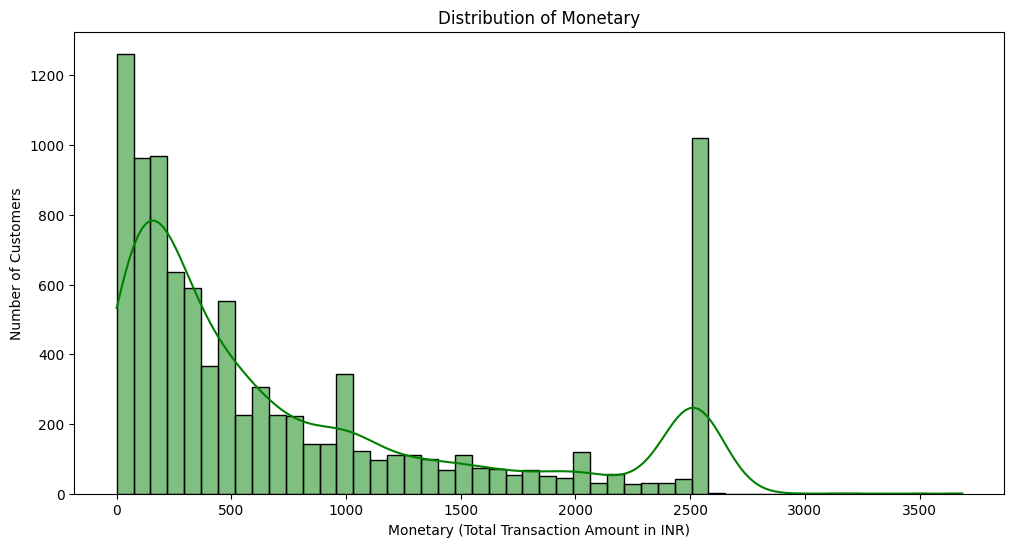

In [28]:
# Visualize the distributions of RFM features
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')
plt.show()

In [29]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,9394.00,9394.00,9394.00
mean,135.62,1.00,769.62
std,81.94,0.04,816.45
min,0.00,1.00,0.00
25%,87.00,1.00,153.00
50%,111.00,1.00,419.79
75%,183.00,1.00,1100.00
max,336.00,3.00,3685.78


In [30]:
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df2['CustGender']= le.fit_transform(df2['CustGender'])
df2['CustLocation']= le.fit_transform(df2['CustLocation'])
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,458,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,1,393,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,1,741,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,1,432,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,1,846,9506.85,2016-09-14,90810,33.00,35.00


In [32]:
df2 = df2.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
892845,1,458,84447.82,11858.00,39.00
444994,1,393,12549.49,250.00,30.00
614896,1,741,33607.65,3360.00,33.00
457036,1,432,38238.86,250.00,33.00
997441,1,846,9506.85,33.00,35.00


In [33]:
df2[df2['TransactionAmount (INR)'] == 0].count()

CustGender                 6
CustLocation               6
CustAccountBalance         6
TransactionAmount (INR)    6
CustomerAge                6
dtype: int64

In [34]:
df2 = df2.drop(df2[df2['TransactionAmount (INR)'] == 0].index,axis = 0)

In [35]:
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns_names)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.60,-0.20,-0.02,1.82,0.05
1,0.60,-0.41,-0.22,-0.22,-0.97
2,0.60,0.73,-0.16,0.33,-0.63
3,0.60,-0.29,-0.15,-0.22,-0.63
4,0.60,1.08,-0.22,-0.26,-0.40


K Means Clustering : 

In [36]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [43]:
X = df2[['CustomerAge', 'TransactionAmount (INR)']].values
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

In [44]:
# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0.60,-0.20,-0.02,1.82,0.05,0,2,0.08,-0.08,-0.21,1.84
1,0.60,-0.41,-0.22,-0.22,-0.97,4,6,-0.75,-0.13,-0.30,-0.12
2,0.60,0.73,-0.16,0.33,-0.63,4,5,-0.75,-0.13,0.68,-0.10
3,0.60,-0.29,-0.15,-0.22,-0.63,4,6,-0.75,-0.13,-0.30,-0.12
4,0.60,1.08,-0.22,-0.26,-0.40,4,5,-0.75,-0.13,0.68,-0.10


In [45]:
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(7)})

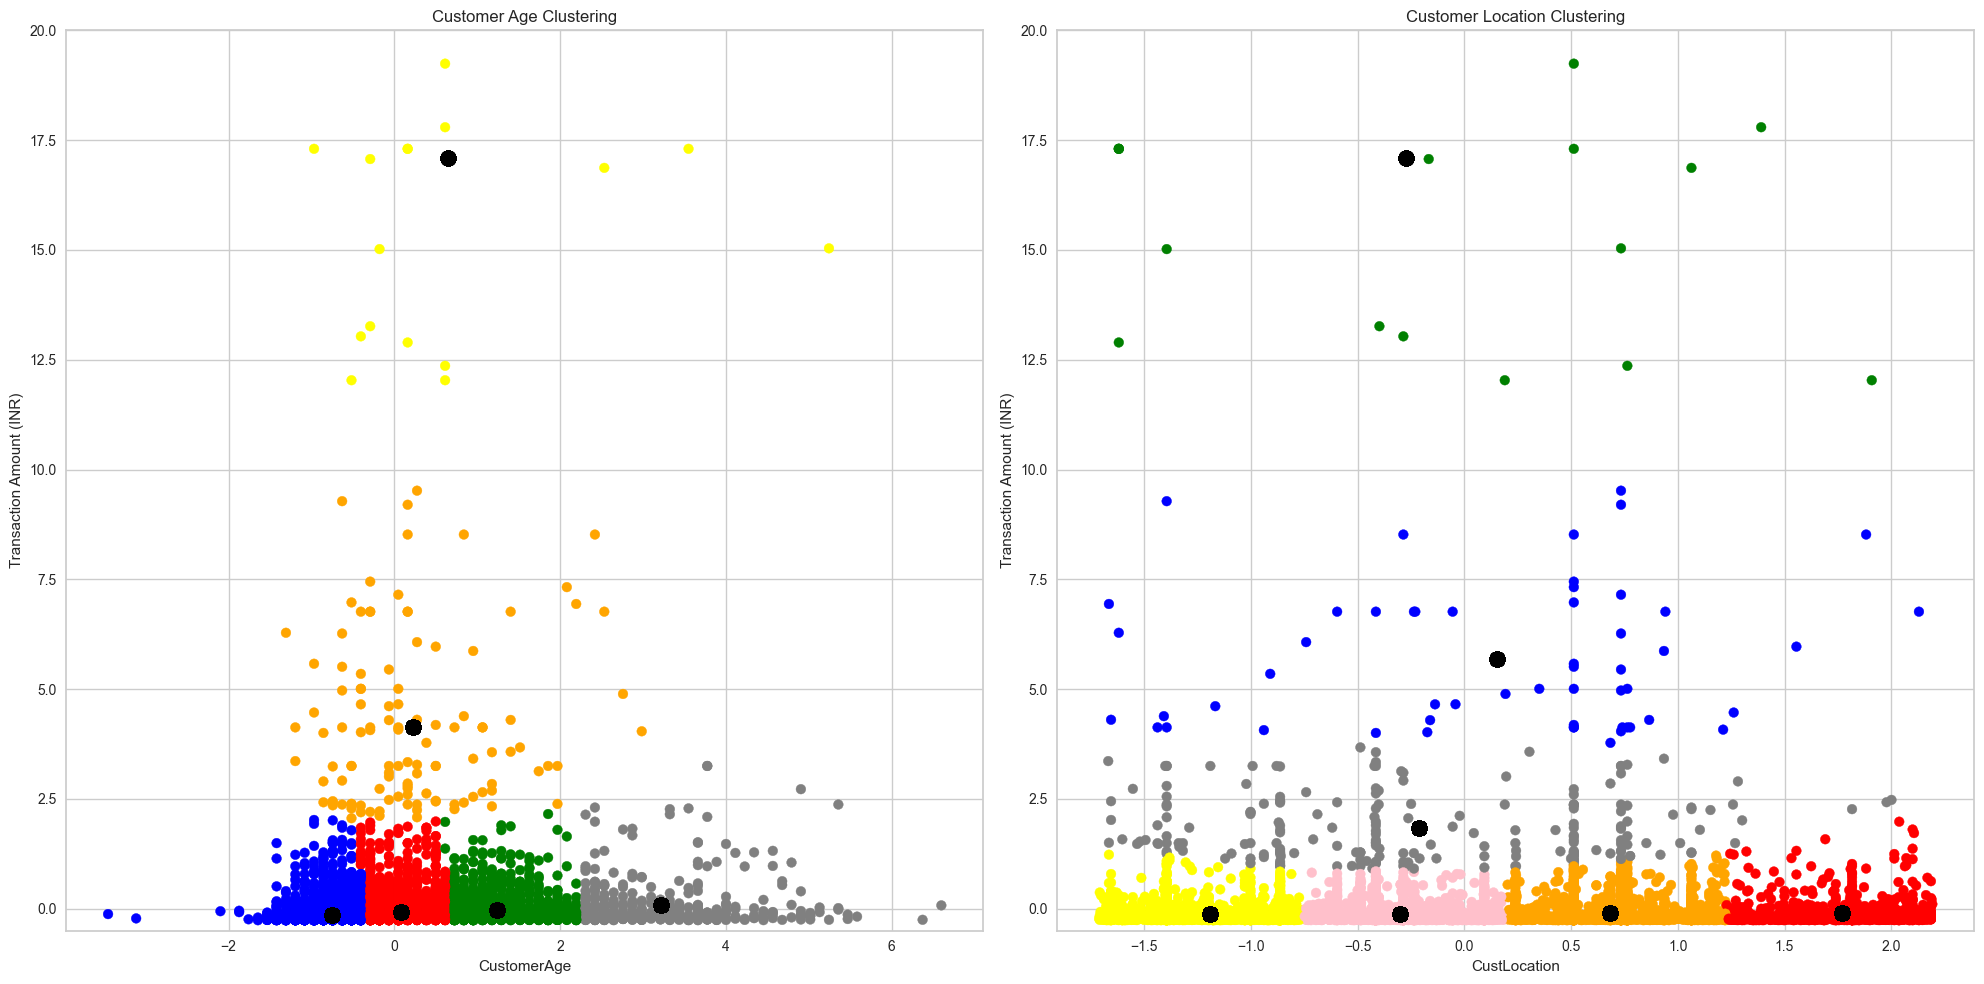

In [46]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['CustomerAge'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='.', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='.', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

Evaluation of the Model: 

We will be using Silhouette Score for the task since it's a unsupervised method.
The Silhouette Score is a metric used to evaluate the quality of clustering results.
It measures how well-separated the clusters are and provides a numerical value between -1 and 1

1. A score close to 1 indicates that the data point is well-clustered and far away from other clusters, representing good separation.
2. A score close to 0 suggests overlapping clusters or data points on the decision boundary between clusters.
3. A negative score indicates that the data point might have been assigned to the wrong cluster.

In [50]:
from sklearn.metrics import silhouette_score

# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df2[['TransactionAmount (INR)', 'CustomerAge']], df2['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score for cluster_location
silhouette_score_location = silhouette_score(df2[['CustLocation','TransactionAmount (INR)']], df2['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.47161049030904445
Silhouette Score for cluster_location: 0.5570672200023222


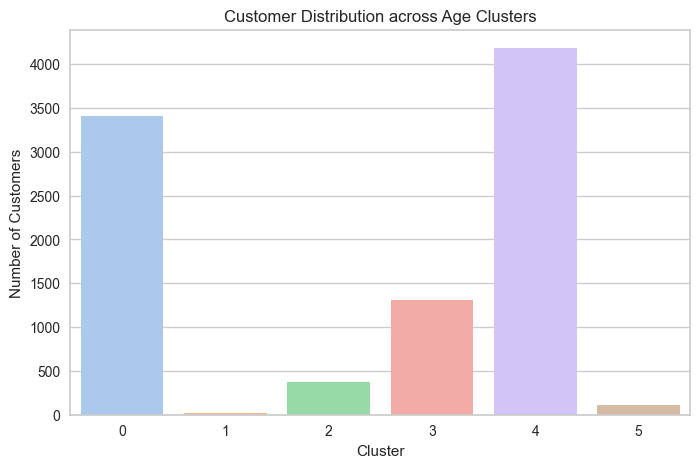

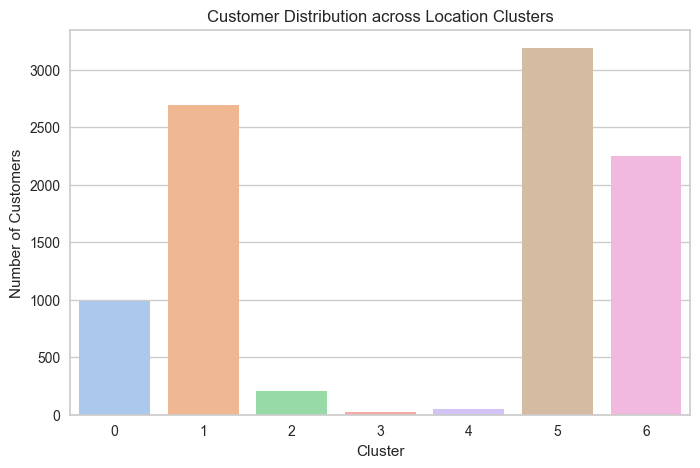

In [49]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Function to plot cluster distribution
def plot_cluster_distribution(cluster_counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='pastel')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()


plot_cluster_distribution(age_cluster_counts, title='Customer Distribution across Age Clusters')
plot_cluster_distribution(location_cluster_counts, title='Customer Distribution across Location Clusters')

Cluster_Age

1) Cluster 0 : middle-aged customers with moderate transaction activity.
2) Cluster 1 : younger customers with low transaction activity and lower account balances.
3) Cluster 2 : older customers who make substantial transactions and maintain higher account balances.
4) Cluster 3 : diverse group of customers with moderate account balances and transaction amounts.
5) Cluster 4 : financially stable customers who make sizeable transactions.
6) Cluster 5 : younger customers who make large transactions.


Cluster_Location

1) Cluster 0 : diverse group of customers from specific locations.
2) Cluster 1 : mixed group with moderate account balances and transaction amounts.
3) Cluster 2 : younger customers from specific locations making significant transactions.
4) Cluster 3 : younger customers from specific locations making substantial transactions.
5) Cluster 4 : customers from various locations with lower account balances and transaction amounts.
6) Cluster 5 : customers from specific locations who maintain higher account balances and make moderate transactions.
7) Cluster 6 : older customers who make substantial transactions and maintain higher account balances.